<a href="https://colab.research.google.com/github/ghrahul/ML-DL-PRACTICE/blob/master/recommendation%20system/correlation_recommendation_engine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd

In [0]:
df = pd.read_csv('drive/My Drive/Colab Notebooks/rating.csv')

In [0]:
df.head()

,userId,movieId,rating,timestamp
0,1,2,3.5,2005-04-02 23:53:47
1,1,29,3.5,2005-04-02 23:31:16
2,1,32,3.5,2005-04-02 23:33:39
3,1,47,3.5,2005-04-02 23:32:07
4,1,50,3.5,2005-04-02 23:29:40


In [0]:
movie_titles = pd.read_csv("drive/My Drive/Colab Notebooks/movie.csv")
movie_titles.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [0]:
df = pd.merge(df,movie_titles,on='movieId')
df.head()

,userId,movieId,rating,timestamp,title,genres
0,1,2,3.5,2005-04-02 23:53:47,Jumanji (1995),Adventure|Children|Fantasy
1,5,2,3.0,1996-12-25 15:26:09,Jumanji (1995),Adventure|Children|Fantasy
2,13,2,3.0,1996-11-27 08:19:02,Jumanji (1995),Adventure|Children|Fantasy
3,29,2,3.0,1996-06-23 20:36:14,Jumanji (1995),Adventure|Children|Fantasy
4,34,2,3.0,1996-10-28 13:29:44,Jumanji (1995),Adventure|Children|Fantasy


In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline

In [0]:
df.groupby('title')['rating'].mean().sort_values(ascending=False).head()

title
Codes of Gender, The (2010)               5.0
Poison (1951)                             5.0
Barchester Chronicles, The (1982)         5.0
Prom Queen: The Marc Hall Story (2004)    5.0
Argentina latente (2007)                  5.0
Name: rating, dtype: float64

In [0]:
df.groupby('title')['rating'].count().sort_values(ascending=False).head()

title
Pulp Fiction (1994)                 67310
Forrest Gump (1994)                 66172
Shawshank Redemption, The (1994)    63366
Silence of the Lambs, The (1991)    63299
Jurassic Park (1993)                59715
Name: rating, dtype: int64

In [0]:
ratings = pd.DataFrame(df.groupby('title')['rating'].mean())
ratings.head()

,rating
title,
#chicagoGirl: The Social Network Takes on a Dictator (2013),3.666667
$ (Dollars) (1971),2.833333
$5 a Day (2008),2.871795
$9.99 (2008),3.009091
$ellebrity (Sellebrity) (2012),2.000000


In [0]:
ratings['num of ratings'] = pd.DataFrame(df.groupby('title')['rating'].count())
ratings.head()

,rating,num of ratings
title,,
#chicagoGirl: The Social Network Takes on a Dictator (2013),3.666667,3
$ (Dollars) (1971),2.833333,24
$5 a Day (2008),2.871795,39
$9.99 (2008),3.009091,55
$ellebrity (Sellebrity) (2012),2.000000,2


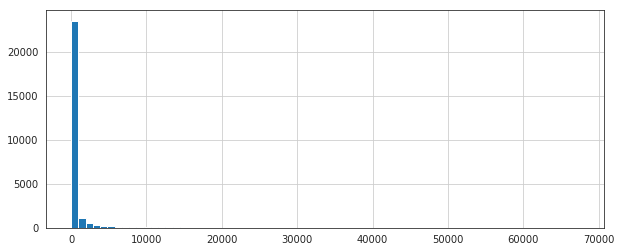

In [0]:
plt.figure(figsize=(10,4))
ratings['num of ratings'].hist(bins=70)

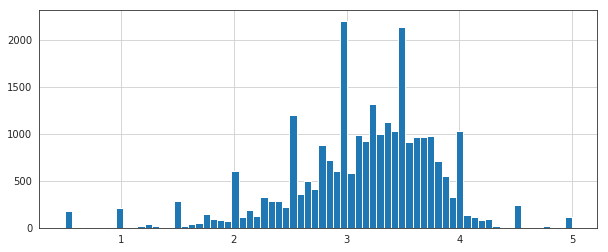

In [0]:
plt.figure(figsize=(10,4))
ratings['rating'].hist(bins=70)

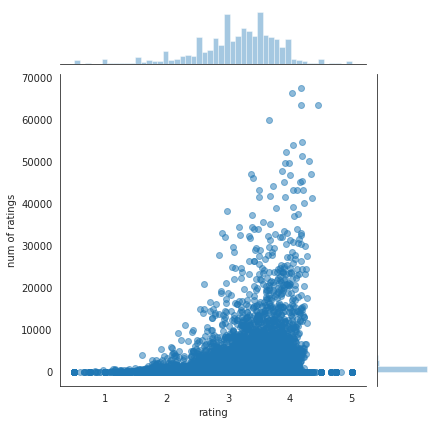

In [0]:
sns.jointplot(x='rating',y='num of ratings',data=ratings,alpha=0.5)

In [0]:
moviemat = df.pivot_table(index='userId',columns='title',values='rating')


In [0]:
ratings.sort_values('num of ratings',ascending=False).head(10)

In [0]:
ratings.head()

In [0]:
starwars_user_ratings = moviemat['Kama Sutra: A Tale of Love (1996)']
#liarliar_user_ratings = moviemat['Liar Liar (1997)']
starwars_user_ratings.head()

In [0]:
similar_to_starwars = moviemat.corrwith(starwars_user_ratings)

In [0]:
corr_starwars = pd.DataFrame(similar_to_starwars,columns=['Correlation'])
corr_starwars.dropna(inplace=True)
corr_starwars.head()

In [0]:
corr_starwars.sort_values('Correlation',ascending=False).head(10)

In [0]:
corr_starwars = corr_starwars.join(ratings['num of ratings'])
corr_starwars.head()

In [0]:
corr_starwars[corr_starwars['num of ratings']>100].sort_values('Correlation',ascending=False).head()

In [0]:
# Run this cell to mount your Google Drive.
from google.colab import drive
drive.mount('/content/drive')